In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("datos_producidos/datos_1.csv")
data

,fecha,provincia,departamento,carneros,ovejas,borregos,capones,cordero/as,total_ovinos,kilos_lana,finura,rinde,humedad,cant_lluvia,tem_max,temp_media,temp_min
0,2012-12-31,CHUBUT,BIEDMA,5785,93378,30168,48447,16071,193849,649130.0,19.80,58.06,58.40,46.4,18.10,12.40,6.70
1,2013-12-31,CHUBUT,BIEDMA,5376,82998,25341,47350,26832,187897,620176.0,19.60,56.68,64.70,226.5,19.90,14.20,8.80
2,2014-12-31,CHUBUT,BIEDMA,4785,82706,29379,35155,29900,181925,649130.0,20.10,61.19,60.50,331.3,20.60,14.70,9.20
3,2015-12-31,CHUBUT,BIEDMA,4440,89262,29663,35437,32343,191145,672480.0,18.58,58.18,58.70,114.2,22.20,15.80,10.20
4,2016-12-31,CHUBUT,BIEDMA,4452,82295,33662,33470,21326,175205,653800.0,17.99,59.93,57.50,88.9,25.20,18.60,12.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2016-12-31,CHUBUT,TELSEN,4896,80262,26471,39243,20290,171162,637000.0,20.20,53.55,50.80,820.0,17.47,11.57,5.77
197,2017-12-31,CHUBUT,TELSEN,4640,77556,27296,36570,17750,163812,637000.0,19.11,56.01,47.17,660.1,16.60,10.93,5.03
198,2018-12-31,CHUBUT,TELSEN,4832,79117,28366,37558,21933,171806,637000.0,20.38,54.64,47.93,604.2,17.63,11.33,5.03
199,2019-12-31,CHUBUT,TELSEN,4781,80109,28428,38109,17731,169158,613021.5,16.88,53.83,47.57,358.4,17.53,11.17,4.83


## Matriz de Correlación

<AxesSubplot:>

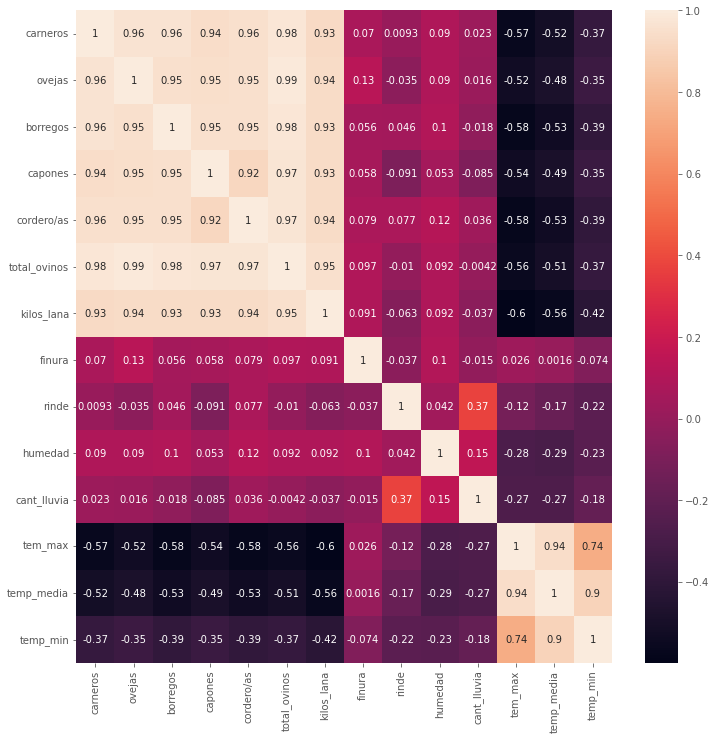

In [5]:
correlation_mat = data.corr()
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(correlation_mat, annot = True, ax = ax)

## Primera Predicción

Variables independientes: 
- mm de lluvia acumulados de cada año
- Cantidad de animales

Variables dependientes:
- Kilos de Lana producidos

In [3]:
X_primera_prediccion = data[['cant_lluvia','total_ovinos']]
y_primera_prediccion = data[['kilos_lana']]

In [4]:
# Separo los datos en entrenamiento y prueba para probar los algoritmos
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
                                                X_primera_prediccion, 
                                                y_primera_prediccion, 
                                                test_size=0.25
                                            )

In [5]:
lr_multiple_1 = linear_model.LinearRegression()
lr_multiple_1.fit(X_train_1, y_train_1)

LinearRegression()

In [6]:
Y_pred_multiple_1 = lr_multiple_1.predict(X_test_1)

print('Precisión del modelo entrenamiento:')
print(str(round(lr_multiple_1.score(X_train_1, y_train_1),4))+'%')

print('Precisión del modelo test:')
print(str(round(lr_multiple_1.score(X_test_1, y_test_1),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test_1, Y_pred_multiple_1),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test_1, Y_pred_multiple_1),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test_1, Y_pred_multiple_1),4)))
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test_1, Y_pred_multiple_1),4)),4)))
print('R2:')
print(str(round(r2_score(y_test_1, Y_pred_multiple_1),4)))

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', lr_multiple_1.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', lr_multiple_1.intercept_)

Precisión del modelo entrenamiento:
0.9078%
Precisión del modelo test:
0.9064%
Varianza Explicada:
0.9066
MAE:
165094.2598
MSE:
50032626551.5506
RMSE:
223679.741
R2:
0.9064
Coefficients: 
 [[-23.39279192   3.66456799]]
Independent term: 
 [23695.66299436]


### METRICAS UTILIZADAS

- *Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. **explained_variance_score** La mejor puntuación posible es 1.0,los valores más bajos son peores. 
- *Error medio absoluto*: Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. **mean_absolute_error MAE** Mientras mas cercano a cero mejor.
- *Error cuadrático medio*: Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. **mean_squared_error MSE** Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *Raíz cuadrada de la media del error al cuadrado*: Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. **RMSE**. Mientras mas cercano a cero mejor. Las unidades de la puntuación de error coinciden con las unidades del valor objetivo que se predice.
- *R cuadrado*: también llamado coeficiente de determinación. Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. **r2_score R2** Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. El coeficiente de determinación, también llamado R cuadrado, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será. 

El problema del coeficiente de determinación, y razón por el cual surge el coeficiente de determinación ajustado, radica en que no penaliza la inclusión de variables explicativas no significativas. Es decir, si al modelo se añaden cinco variables explicativas que guardan poca relación con lo que se intenta predecir, el R cuadrado aumentará. Es por ello que muchos expertos económetras, estadísticos y matemáticos se oponen al uso del R cuadrado como medida representativa de la bondad del ajuste real.

Quizas se podría programar el coeficiente de determinación ajustado


Método "score": Todos los algoritmos incluyen un método "score" que provee el resultado de un criterio de evaluación por defecto para aquel problema al que están orientados. De esta manera, el método score de un modelo de clasificación basado en árbol de decisión, DecisionTreeClassifier, devuelve la precisión del modelo, entendida como el porcentaje de valores clasificados correctamente con respecto al total de elementos. O una regresión lineal devuelve el coeficiente de determinación, o R2, entendida como el porcentaje de la variancia de la variable dependiente que es predecible a partir de la variable independiente.

La Precisión de una clase define cuan confiable es un modelo en responder si un punto pertenece a esa clase

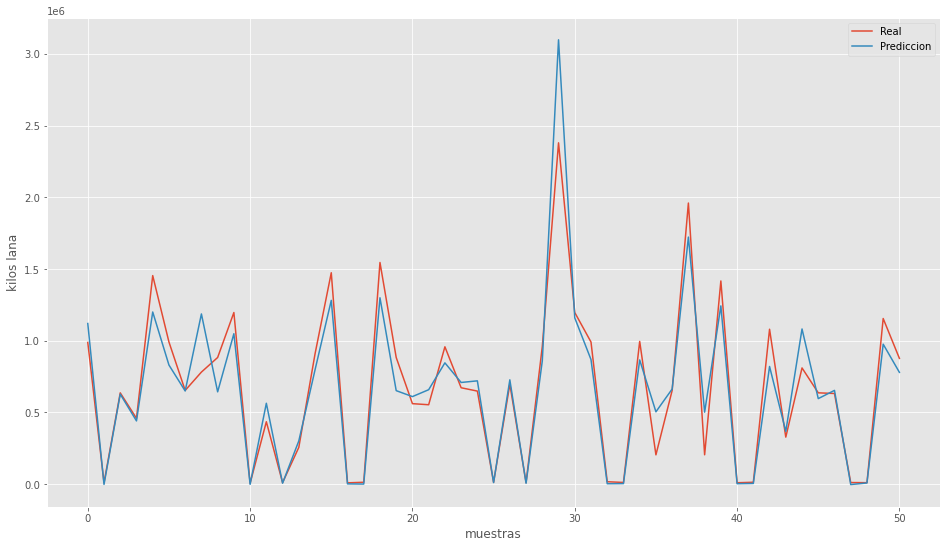

In [18]:
plt.plot(range(len(y_test_1)),y_test_1,label="Real")
plt.plot(range(len(Y_pred_multiple_1)),Y_pred_multiple_1,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('kilos lana')
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [ ]:
plt.plot(range(len(y_test_1)),y_test_1,label="Real")
plt.plot(range(len(Y_pred_multiple_1)),Y_pred_multiple_1,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('kilos lana')
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Segunda Predicción

Variables independientes: 
- mm de lluvia acumulados de cada año
- Cantidad de ovejas

Variables dependientes:
- Corderos

In [19]:
X_multiple_2 = data[['cant_lluvia','ovejas']]
y_multiple_2 = data[['cordero/as']]

In [22]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_multiple_2, y_multiple_2, test_size=0.25)

In [23]:
lr_multiple_2 = linear_model.LinearRegression()
lr_multiple_2.fit(X_train_2, y_train_2)

LinearRegression()

In [25]:
Y_pred_multiple_2 = lr_multiple_2.predict(X_test_2)

print('Precisión del modelo entrenamiento:')
print(str(round(lr_multiple_2.score(X_train_2, y_train_2),4))+'%')

print('Precisión del modelo test:')
print(str(round(lr_multiple_2.score(X_test_2, y_test_2),4))+'%')

print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test_2, Y_pred_multiple_2),4)))
print('MAE:')
print(str(round(mean_absolute_error(y_test_2, Y_pred_multiple_2),4)))
print('MSE:')
print(str(round(mean_squared_error(y_test_2, Y_pred_multiple_2),4)))
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test_2, Y_pred_multiple_2),4)),4)))
print('R2:')
print(str(round(r2_score(y_test_2, Y_pred_multiple_2),4)))

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', lr_multiple_2.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', lr_multiple_2.intercept_)

Precisión del modelo entrenamiento:
0.9051%
Precisión del modelo test:
0.9174%
Varianza Explicada:
0.9174
MAE:
8114.0865
MSE:
101332092.3691
RMSE:
10066.3843
R2:
0.9174
Coefficients: 
 [[0.49752131 0.35582575]]
Independent term: 
 [-6835.28873186]


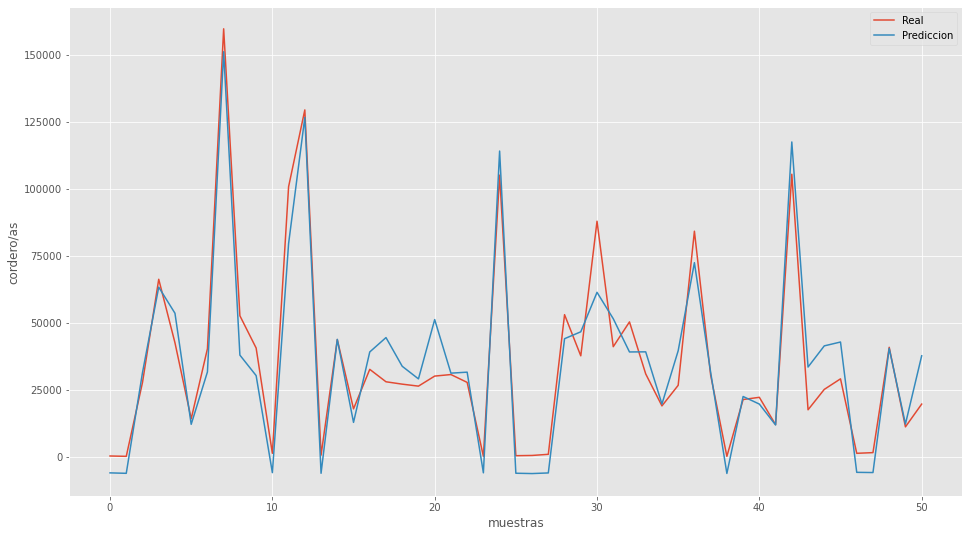

In [26]:
plt.plot(range(len(y_test_2)),y_test_2,label="Real")
plt.plot(range(len(Y_pred_multiple_2)),Y_pred_multiple_2,label="Prediccion")
 #Mostrar imagen
plt.xlabel('muestras')
# Set the y axis label of the current axis.
plt.ylabel('cordero/as')
# Set a title of the current axe
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()